### In this notebook I will perform a cleaning of the data and a exploratory data analysis

## I just noticed, cleaning is a b*tch
Well,actually the problem was the encoding and when i tried to remove the weird names by skipping fields separated by commas it all got off because there were commas inside double quotes inside commas. I thought there was a lot of work to be done.
I just had to use the correct encoding

In [40]:
import numpy as np
import pandas as pd

### Cleaning

In [41]:
df = pd.read_csv("weird_enconding/spotify-2023.txt", encoding="windows-1252")

In [42]:
df.dtypes
# Streams should be a number

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [43]:
df.index[df.streams=='BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

Index([574], dtype='int64')

In [44]:
df=df.drop(574)

In [45]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Formatear datos, llenar valores vacíos si se van a usar o los debería eliminar hmm
Creo que las series que me interesan tienen ya sus datos, aunque mejor lo elimino, porque puedo agregar bias
Entonces, eliminaré las filas sin los datos que faltan

In [46]:
# Find the rows with at least one missing value. The axis specifies that i want rows
df.index[df.isnull().any(axis=1)]

Index([ 12,  14,  17,  22,  35,  44,  46,  54,  55,  58,
       ...
       873, 882, 884, 895, 899, 901, 903, 927, 938, 940],
      dtype='int64', length=136)

In [47]:
# Drop is used to remove rows or cols
df=df.drop(df.index[df.isnull().any(axis=1)])

In [48]:
df.streams=df.streams.astype('int')

### Now that i have the correct data, i will plot a histogram with the target value
hmm maybe i want t predict the popularity
An easy-to-use library to plot is seaborn

In [49]:
import seaborn as sns

%matplotlib inline

<Axes: xlabel='streams', ylabel='Count'>

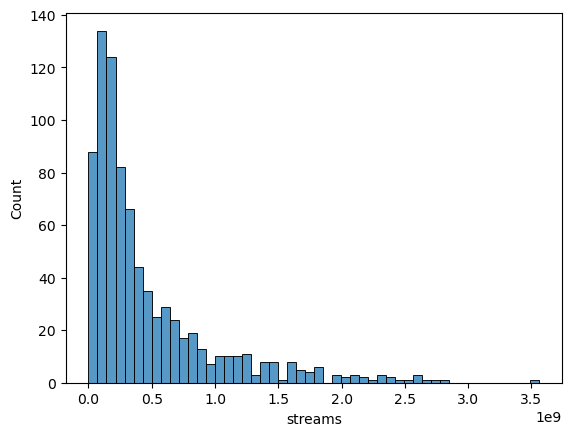

In [52]:
sns.histplot(df.streams, bins=50)

# Podemos observar una cola
# Usamos funciń de np log1p

In [53]:
streams_logs = np.log1p(df.streams)

#Claramente observamos una campana
#la media es aproximadamente e^19 reproducciones

<Axes: xlabel='streams', ylabel='Count'>

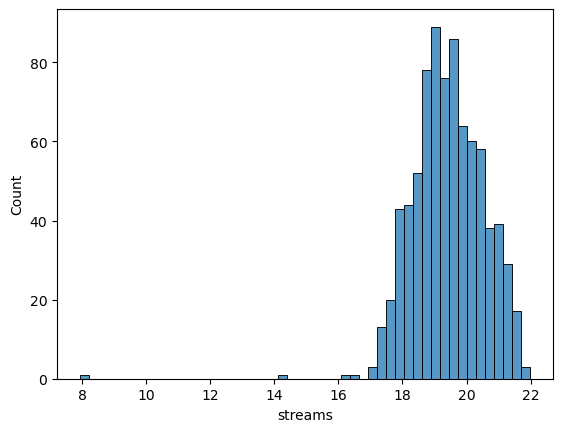

In [54]:
sns.histplot(streams_logs, bins=50)

### Validation Framework

In [70]:
# Seleccionamos 60% para training set, 20% test set, 20% validation set

valn = testn = int(len(df)*.2)
trainn = len(df) - valn-testn
trainn,testn,valn

(490, 163, 163)

In [77]:
df.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       943, 944, 945, 946, 947, 948, 949, 950, 951, 952],
      dtype='int64', length=816)

In [98]:
idx = np.arange(len(df))

np.random.seed(0)
np.random.shuffle(idx)

#This will be our data
df_train = df.iloc[idx[:trainn]]
df_test = df.iloc[idx[trainn:testn+trainn]]
df_val = df.iloc[idx[testn+trainn:]]

#This will be our targets
y_train = np.log1p(df_train.streams.values)
y_test = np.log1p(df_test.streams.values)
y_val = np.log1p(df_val.streams.values)

#Now we remove the target to leave the df's with features only
del df_train['streams']
del df_test['streams']
del df_val['streams']

In [99]:
df_test

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
630,Mr. Brightside,The Killers,1,2003,9,23,51979,15,306,99,...,148,C#,Major,35,24,93,0,0,10,8
615,The Nights,Avicii,1,2014,1,1,17354,8,92,122,...,126,F#,Major,53,66,85,2,0,24,4
189,Take Me To Church,Hozier,1,2013,9,13,23804,31,187,99,...,129,E,Minor,57,41,66,63,0,12,5
62,Left and Right (Feat. Jung Kook of BTS),"Charlie Puth, BTS, Jung Kook",3,2022,6,24,3107,39,38,0,...,101,D,Major,88,72,59,62,0,9,3
698,Sweetest Pie,"Dua Lipa, Megan Thee Stallion",2,2022,3,11,3501,0,69,2,...,124,G,Major,81,68,63,17,0,10,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Feliz Cumpleaï¿½ï¿½os Fe,Feid,1,2022,8,19,3430,38,45,69,...,95,F,Major,87,57,55,10,0,29,7
176,Shake It Off,Taylor Swift,1,2014,1,1,21335,13,328,70,...,160,G,Major,65,95,80,5,0,41,16
182,Creep,Radiohead,1,1992,9,21,36724,7,146,72,...,92,G,Major,53,12,34,1,0,12,4
634,Shallow,"Lady Gaga, Bradley Cooper",2,2018,9,27,16636,12,368,155,...,96,G,Major,57,30,40,38,0,26,3


In [ ]:
# Now it is recommended to delete 